In [1]:
#!/usr/bin/python3.10

# Sequences advanced tutorial: Oak trunk annual shoots


## Configuration
### It is assumed that this notebook is run from StructureAnalysis/sequence_analysis/tutorials

    Functions used:
        * data: Sequences, Vectors
        * output: Plot, Display
        * data exploration: ExtractHistogram, Cluster, Regression, ValueSelect, VarianceAnalysis, Compare, ContingencyTable, Estimate

    :Authors: Thomas Cokelaer
    :References: Oak trunk annual shoot AML example :download:`example_oak.py`
    :Data: Patrick Heuret

In this example, we will explain some functionalities of sequence_analysis package by going through the python script `example_oak.py` step by step. First, we will start to explain what is a sequence data file and how to explore and visualize its contents.

**Import OpenAlea packages**

In [2]:
from openalea.stat_tool import _stat_tool
from openalea.sequence_analysis import _sequence_analysis
from openalea.sequence_analysis import Sequences
from openalea.stat_tool import Vectors, Regression


from openalea.stat_tool.data_transform import *
from openalea.stat_tool.cluster import Cluster
from openalea.stat_tool import (Transcode, 
VarianceAnalysis, 
ContingencyTable, 
Compare, 
Estimate,
Display)

import openalea.stat_tool.plot #import DISABLE_PLOT
from openalea.stat_tool.plot import DISABLE_PLOT
DISABLE_PLOT = False

import os

from openalea.stat_tool.output import plot, Plot

plot.DISABLE_PLOT = DISABLE_PLOT

from openalea.stat_tool.plot import get_plotter, mplotlib 

For correct figure rendering

In [3]:
%matplotlib inline

#####  Place variables in markdown outputs

In [4]:
from IPython.display import Markdown
from IPython.core.magic import register_cell_magic


@register_cell_magic
def markdown(line, cell):
    return Markdown(cell.format(**globals()))

## Preliminaries: data set

In [5]:
import sys, os

In [6]:
sys.path

['/home/jdurand/devlp/Git/openalea/StructureAnalysis',
 '/home/jdurand/miniforge3/envs/openalea/lib/python310.zip',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/lib-dynload',
 '',
 '/home/jdurand/.local/lib/python3.10/site-packages',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/OpenAlea.SConsX-2.4.0-py3.9.egg',
 '/home/jdurand/devlp/Git/openalea/StructureAnalysis/stat_tool/src',
 '/home/jdurand/devlp/Git/openalea/StructureAnalysis/sequence_analysis/src',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/openalea.deploy-3.1.2-py3.10.egg']

In [7]:
sys.path.append(".." + os.sep + "tutorials")

In [8]:
from pathlib import Path
from openalea.sequence_analysis import __path__ as seq_path
data_path = Path(seq_path[0])
data_path = str(Path.joinpath(data_path.parent.parent.parent.absolute(), "share","data"))


The file `chene_sessile_15pa.seq` is used as a data set. Its
extension `seq` indicates that this file contains a list of sequences. 

This file contains an header that provides the number of variables and their
types. Here there are 6 variables that are labelled as **STATE** variables. 
There are 46 sequences in total, and a sequence looks like::

    95 110 219 2 52 14 | 96 17 119 2 24 9 | 97 57 101 2 33 1

Each element in the sequence is separated by the other by the pipe
    symbol, which is optional when the sequence is univariate. In the sequence
    above, we have 6 variables and each sequence is 3-elements long (one for
    each year 95, 96, 97).

The Sequences data structures allows to read a file and returns a sequences object that can be indexed like a normal list. The first index being the sequence index and the
second index being the vector index.

In [9]:
seq = Sequences(data_path + os.sep + 'chene_sessile_15pa.seq')
seq[0]
seq[0][1]
seq[0,1]

[96, 17, 119, 2, 24, 9]

In [10]:
seq[0]

[[95, 110, 219, 2, 52, 14], [96, 17, 119, 2, 24, 9], [97, 57, 101, 2, 33, 1]]

In [11]:
seq[0][1]

[96, 17, 119, 2, 24, 9]

In [12]:
seq[0,1]

[96, 17, 119, 2, 24, 9]

Note the syntax to access the second vector of the first sequence. First, 
   indices starts at zero like in C/python languages and the index syntax may be either   [i][j] or [i,j].

You may want to extract observations for each sequence at each time step as an unstructured collection of vectors:



In [13]:
seq.nb_sequence

46

In [14]:
vec = Vectors(seq)

In [15]:
vec.nb_vector

138

In [16]:
assert vec[3*10] == seq[10][0]

138 is simply the number of sequences times the number of element per sequences (3 here).


# Read sequences in a file and plot a data viewpoint

Let us come back to the example. Once the data being read, we can plot the results using a Data viewpoint (see `openalea.stat_tool.output.Plot`).

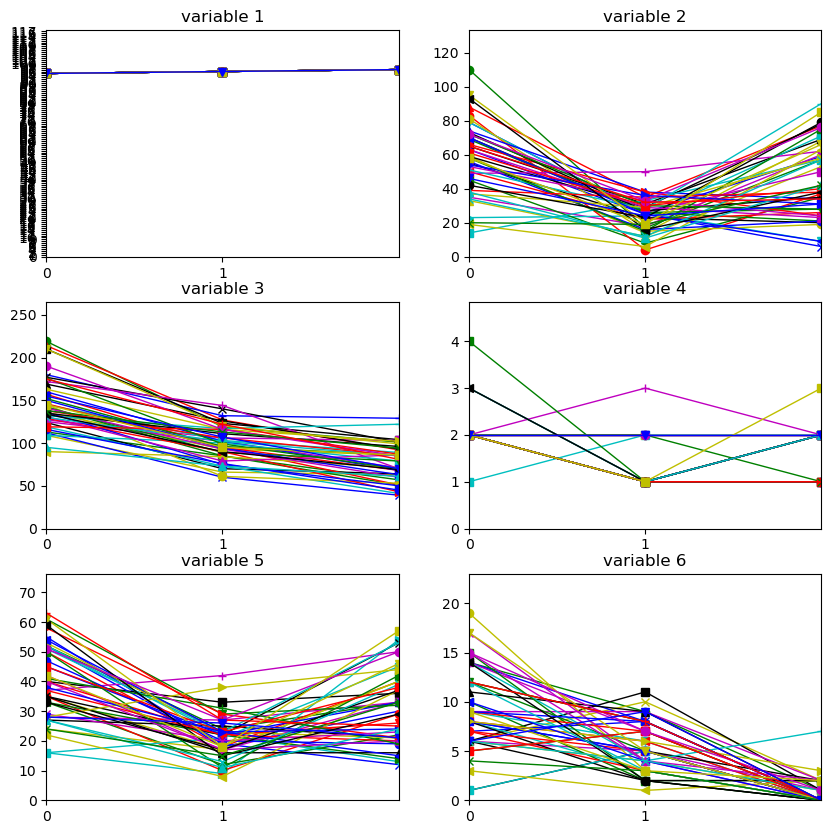

In [17]:
Plot(seq, ViewPoint="Data")

# Looking at one variable

On the first line of the following code, we first extract a given variable (the third one) and then cluster into bins it before plotting the variable histogram. Note that the extraction is made in such a way that each vector in each sequence is extracted in a single object. So you have 138 vectors in the **marginal3** variable.

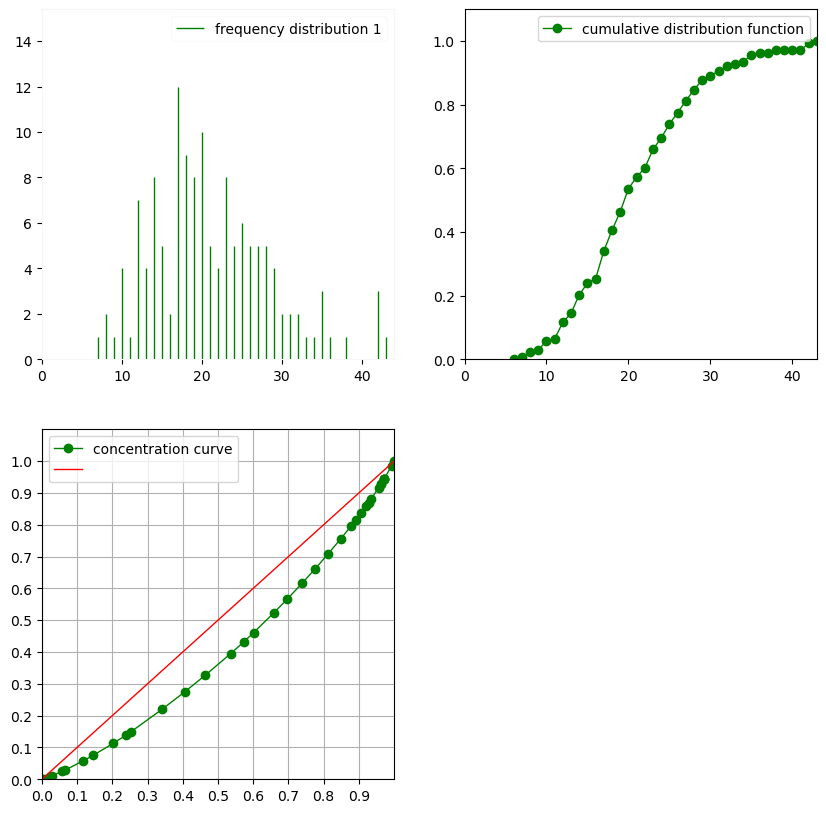

In [18]:
marginal3 = ExtractHistogram(seq, "Value", 3)
Plot(Cluster(marginal3, "Information", 0.75))

# Regression and vectors


Herebelow, we first get a list of vectors in place of the sequence.

The variable marginal3 could have been obtained as follows::

In [19]:
vec10 = Vectors(seq)
marginal3 = ExtractHistogram(vec10, 3)

Now, coming back to the first (year) and second variable (growth length), we plot the average of the second variable versus the year as follows

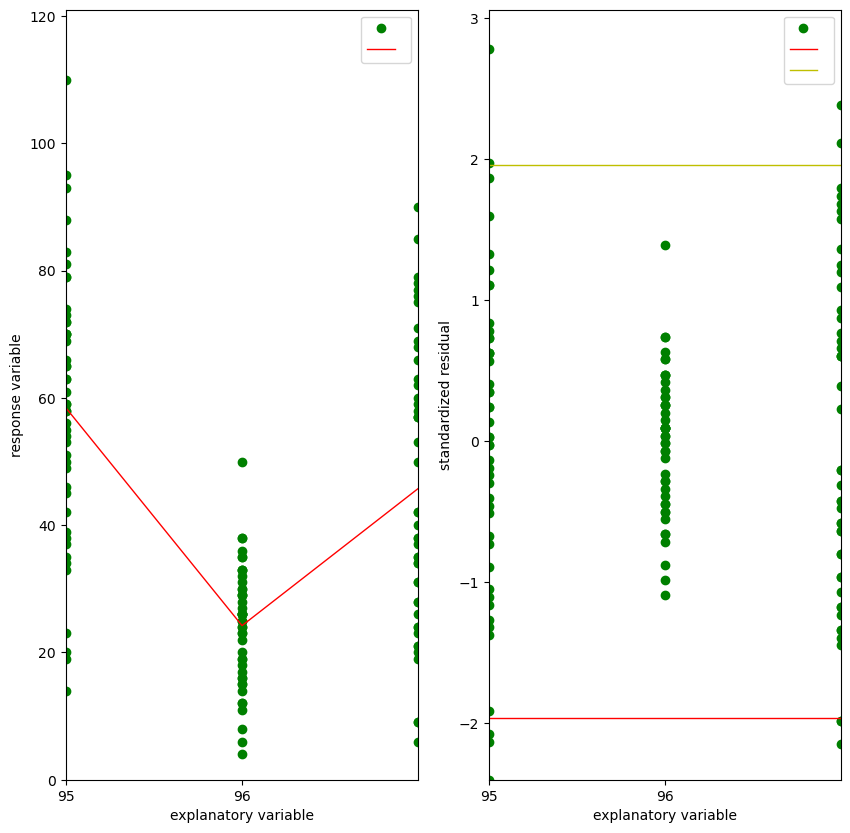

In [20]:
# plot of the average sequence
Plot(Regression(vec, "MovingAverage", 1, 2, [1]))

# Comparison and variance analysis

Then, we want to look those data in more details by selecting the length year by year. So, we first select each year one by one (line 1 to 3 below). Here, `ValueSelect` selects the first variable when its values is 95, or 96 or 97 from which an histogram is extracted. All 3 histograms can be plotted together.

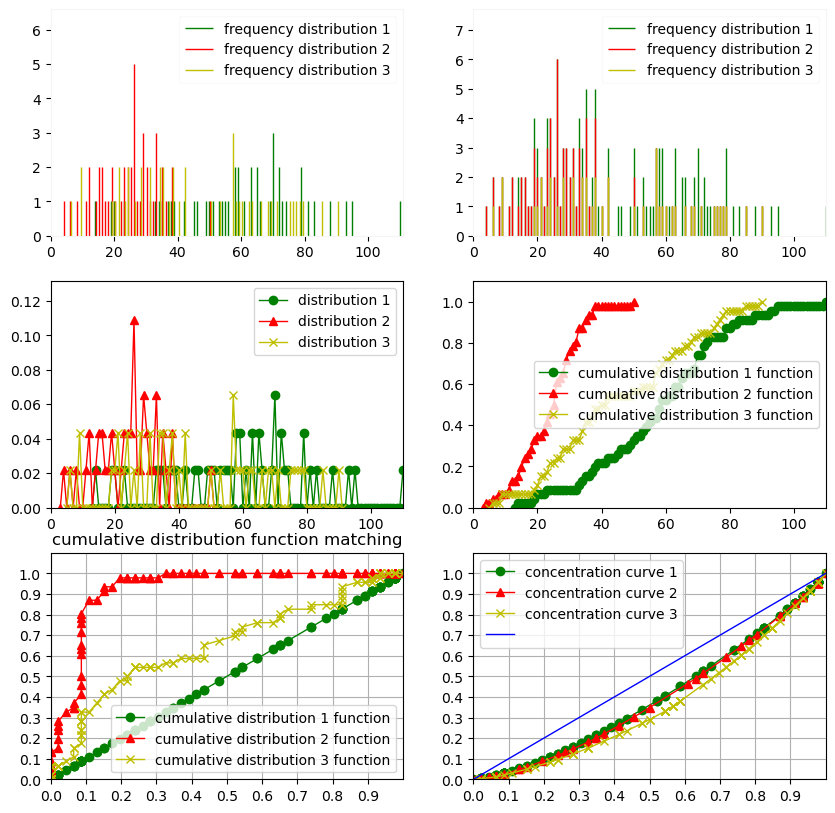

In [21]:
vec95 = ValueSelect(vec, 1, 95)
vec96 = ValueSelect(vec, 1, 96)
vec97 = ValueSelect(vec, 1, 97)

VarianceAnalysis(vec, 1, 2, "N")


#print type(ExtractHistogram(vec95, 2))

Compare(ExtractHistogram(vec95, 2), ExtractHistogram(vec96, 2), ExtractHistogram(vec97, 2), "N")
Plot(ExtractHistogram(vec95, 2), ExtractHistogram(vec96, 2), ExtractHistogram(vec97, 2))

The output of the variance analysis `VarianceAnalysis` is


In [23]:
print(VarianceAnalysis(vec, 1, 2, "N"))

value                                 95          96          97
sample size                           46          46          46
mean                             58.4348     24.2174     45.7609
variance                         438.873     88.5739     501.875
standard deviation               20.9493     9.41137     22.4026
mean absolute deviation          16.3724     7.41588     19.5227
coefficient of concentration     0.19955    0.215518    0.277259
coefficient of skewness       -0.0383523   0.0248062    0.155391
coefficient of kurtosis        -0.219122  -0.0256427    -1.10015

source of variation | degrees of freedom | sum of squares | mean square
between samples    2  27532.2  13766.1
within samples   135  46319.5  343.107
total            137  73851.7  539.064

F-test (2 degrees of freedom, 135 degrees of freedom)
F-value: 40.1219   critical probability: 2.11213e-14
reference F-value: 3.0632   reference critical probability: 0.05
reference F-value: 4.7659   reference critical proba

# Comparison and ContingencyTable

Here again, we compare variables but looking at the ranks rather than the years.   
We first look at the contingency table...


In [27]:
print(ContingencyTable(vec, 1, 4))

contingency table

      1    2    3    4
95    1   41    3    1   46
96   38    7    1    0   46
97   18   27    1    0   46
     57   75    5    1  138

deviation table

            1          2          3          4
95        -18         16    1.33333   0.666667
96         19        -18  -0.666667  -0.333333
97         -1          2  -0.666667  -0.333333

chi-square contribution table

              1            2            3            4
95     0.270397     0.162371    0.0169137    0.0211421
96     0.301275     0.205501   0.00422842   0.00528553
97  0.000834557   0.00253705   0.00422842   0.00528553

chi-square test (6 degrees of freedom)
chi-square value: 63.0653   critical probability: 1.07046e-11
reference chi-square value: 12.5916   reference critical probability: 0.05
reference chi-square value: 16.8119   reference critical probability: 0.01



... and then plot some histograms.

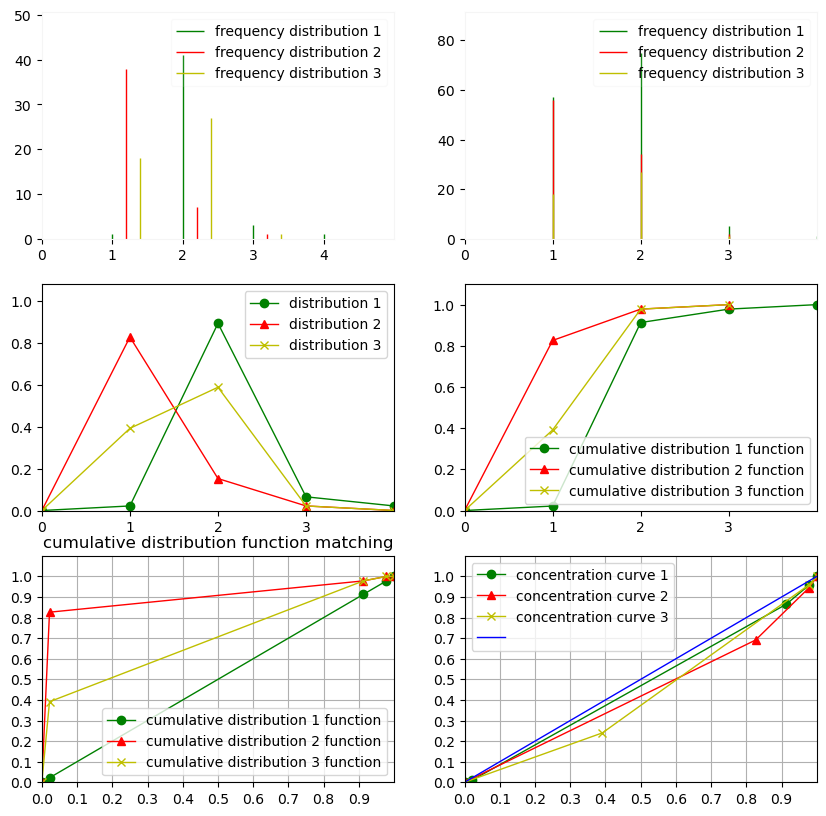

In [25]:
VarianceAnalysis(vec, 1, 4, "O")
Compare(ExtractHistogram(vec95, 4), ExtractHistogram(vec96, 4), ExtractHistogram(vec97, 4), "O")
Plot(ExtractHistogram(vec95, 4), ExtractHistogram(vec96, 4), ExtractHistogram(vec97, 4))

# Estimate

Now, we extract an historam from the second variable and estimated a model that is a mixture of 4 negatibe binomial
distribution and plot the results either the mixture model or component by component


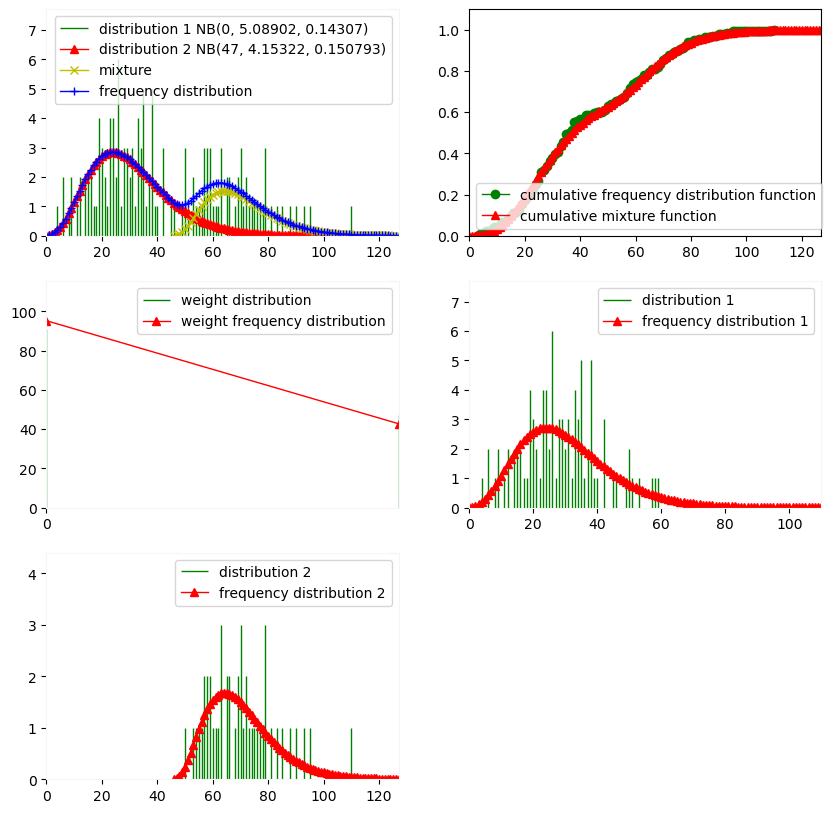

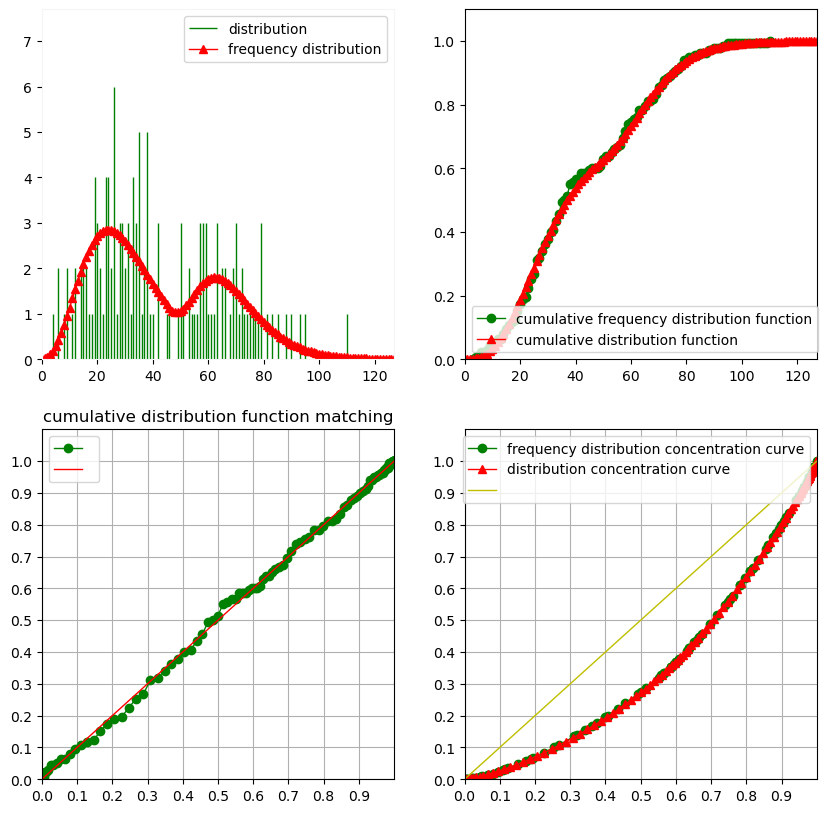

In [28]:
mixt20 = Estimate(ExtractHistogram(vec, 2), "MIXTURE", "NB", "NB", "NB", "NB", NbComponent="Estimated")
Display(mixt20)
Plot(mixt20)
Plot(ExtractDistribution(mixt20, "Mixture"))

# Regression

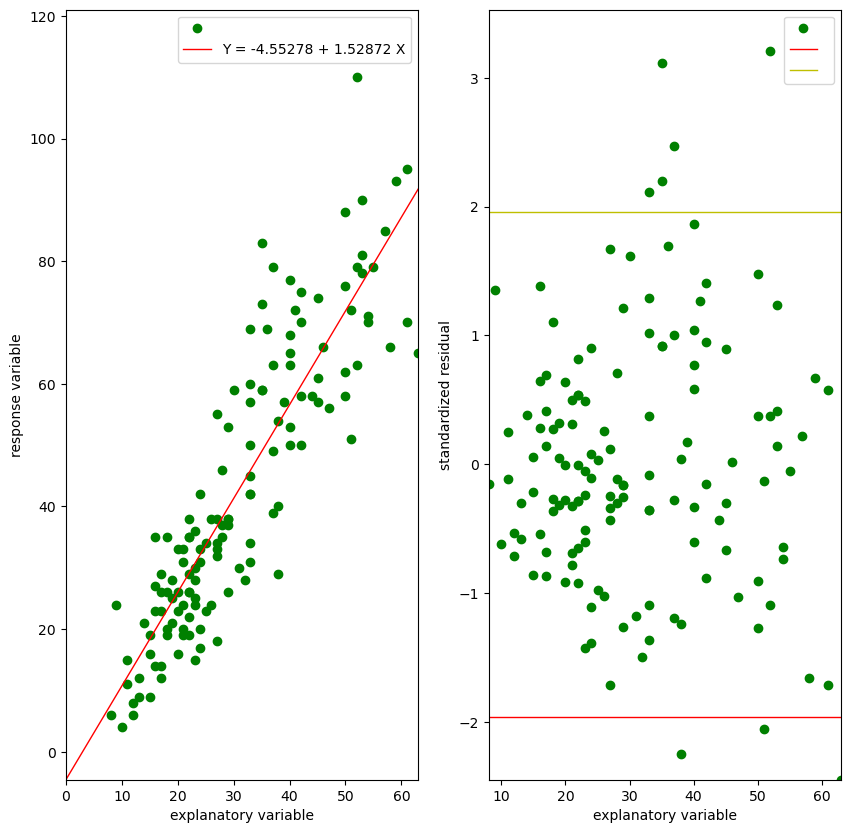

In [29]:
regress10 = Regression(vec, "Linear", 5, 2)
Display(regress10)
Plot(regress10)